In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/superbowlads/superbowl-ads.csv


In [2]:
df = pd.read_csv('../input/superbowlads/superbowl-ads.csv',error_bad_lines=False)
df.head(10)

b'Skipping line 15: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 5\nSkipping line 26: expected 4 fields, saw 5\nSkipping line 27: expected 4 fields, saw 5\nSkipping line 28: expected 4 fields, saw 5\nSkipping line 302: expected 4 fields, saw 5\nSkipping line 303: expected 4 fields, saw 5\nSkipping line 304: expected 4 fields, saw 5\nSkipping line 305: expected 4 fields, saw 5\nSkipping line 306: expected 4 fields, saw 5\nSkipping line 307: expected 4 fields, saw 5\nSkipping line 308: expected 4 fields, saw 5\nSkipping line 309: expected 4 fields, saw 5\nSkipping line 310: expected 4 fields, saw 5\nSkipping line 311: expected 4 fields, saw 5\nSkipping line 446: expected 4 fields, saw 5\nSkipping line 470: expected 4 fields, saw 5\nSkipping line 509: expected 4 fields, saw 5\nSkipping line 548: expected 4 fields, saw 5\nSkipping line 549: expected 4 fields, saw 6\nSkipping line 550: expected 4 fields, saw 6\nSkipping line 551: expected 4 fields, saw 5\nSkipping line

,Year,Product Type,Product/Title,Plot/Notes
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene..."
5,1981,Camera,"Polaroid""Now with a Flash""",A couple walks in a park. The man shows that n...
6,1982,Computer,"RadioShack""Color Computer""",A commercial for the TRS-80 computer.
7,1982,Restaurant,"McDonald's""Hopscotch""",Two kids are playing hopscotch while singing t...
8,1984,Computer,"Apple Inc.""1984""",In what some call the greatest Super Bowl comm...
9,1984,Computer,"Atari""Get Started""",NaN


In [3]:
df.isnull().sum()

Year              0
Product Type      0
Product/Title     1
Plot/Notes       15
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df['Product Type'].value_counts().nlargest(10)

Film          135
Car            71
Beer           46
Website        44
Food           36
Soft drink     25
TV series      19
Wireless       13
Restaurant      8
Candy           7
Name: Product Type, dtype: int64

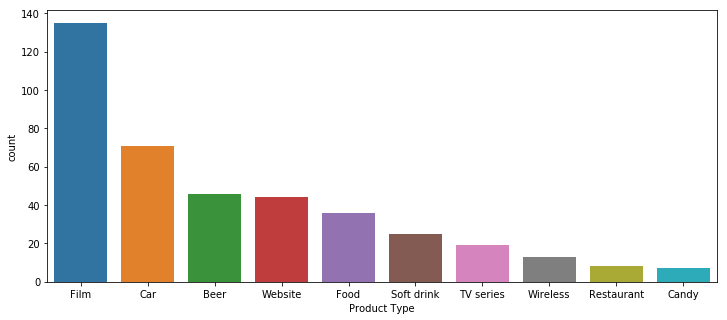

In [6]:
plt.figure(figsize = (12,5))
sns.countplot(x='Product Type',data=df,order= df['Product Type'].value_counts().iloc[:10].index)

In [7]:
df['Company'] = df['Product/Title'].apply(lambda x: x.split("\"")[0])
df

,Year,Product Type,Product/Title,Plot/Notes,Company
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,Chrysler
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,Pontiac
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,Master Lock
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,Xerox
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",Coca-Cola
...,...,...,...,...,...
529,2020,Car,"Jeep """"""Groundhog Day"""""" ""Groundhog Day commer...",meeting with Punxsutawney Phil again as he is...,Jeep
530,2020,Car,"Kia Seltos """"""Tough Never Quits"""""" ""Rookie Jos...",Oklahoma offering advice and inspiration to h...,Kia Seltos
531,2020,Car,"Porsche Taycan """"""The Heist"""""" ""Security profe...","a 917 K and a 918 Spyder.[227]""",Porsche Taycan
536,2020,Food,"Planters """"""Tribute"""""" ""Following his death in...",Mr. Peanut returns to life as a newborn child...,Planters


In [8]:
df['Company'].value_counts().nlargest(10)

Budweiser     20
Pepsi         16
T-Mobile      13
Bud Light     13
Doritos       10
E*Trade        8
Bud Light      6
Toyota         5
Audi           5
FedEx          5
Name: Company, dtype: int64

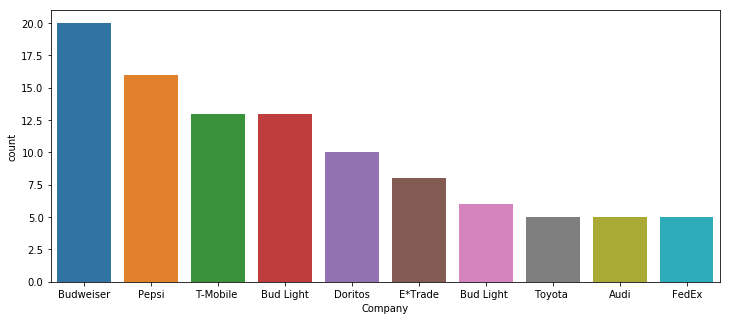

In [9]:
plt.figure(figsize = (12,5))
sns.countplot(x='Company',data=df,order=df.Company.value_counts().iloc[:10].index)